# take the same setting as Sam for the two agents with quadratic functions, to assess the impact of the initial conditions

In [1]:
import numpy as np # linear algebra
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import copy

%matplotlib inline
%matplotlib widget   




## 2 types of 

functions:

$f_{well}(x_1, x_2) = 0.05x_1^2 + 0.05x_2^2$

$f_{ill}(x_1, x_2) = 0.5x_1^2 + 0.005x_2^2$

- I need a setup in which the agents have a **local optima != global optimum** 
    - such that the consensus term's job is not done by the gradient descent term;
    - such that the integral feedback term relevant

Different initial conditions : we start with the agents 30 degrees apart -> next copndition, we rotate their initial conditions to the right by 30  degrees - total of 12 initial conditions

2 functions: total of 24 trials to run

## Private objectives

The global optimum for these functions must be (0, 0)

### Well-defined Hessian:
$f_1^{well}(x_1, x_2) = 0.05(2-x_1)^2 + 0.05x_2^2$

$f_2^{well}(x_1, x_2) = 0.05(2+x_1)^2 + 0.05x_2^2$

$f_3^{well}(x_1, x_2) = 0.05x_1^2 + 0.05(2-x_2^2)$

$f_4^{well}(x_1, x_2) = 0.05x_1^2 + 0.05(2+x_2^2)$


### Ill-defined Hessian:
$f_1^{ill}(x_1, x_2) = 0.5(2-x_1)^2 + 0.005x_2^2$

$f_2^{ill}(x_1, x_2) = 0.5(2+x_1)^2 + 0.005x_2^2$

$f_3^{ill}(x_1, x_2) = 0.5x_1^2 + 0.005(2-x_2^2)$

$f_4^{ill}(x_1, x_2) = 0.5x_1^2 + 0.005(2+x_2^2)$

In [105]:

def f_global_well(x1, x2):
    return 0.05 * ((2 - x1) ** 2) + 0.05 * (x2 ** 2) + 0.05 * ((2 + x1) ** 2) + 0.05 * (x2 ** 2) + 0.05 * (x1 ** 2) + 0.05 * ((2 - x2) ** 2) +  0.05 * (x1 ** 2) + 0.05 * ((2 + x2) ** 2)

def f_global_ill(x1, x2):
    return 0.5 * ((2 - x1) ** 2) + 0.005 * (x2 ** 2) + 0.5 * ((2 + x1) ** 2) + 0.005 * (x2 ** 2) + 0.5 * (x1 ** 2) + 0.005 * ((2 - x2) ** 2) +  0.5 * (x1 ** 2) + 0.005 * ((2 + x2) ** 2)



def f1_well(x1, x2):
    return 0.05 * ((2 - x1) ** 2) + 0.05 * (x2 ** 2)
def f2_well(x1, x2):
    return 0.05 * ((2 + x1) ** 2) + 0.05 * (x2 ** 2)
def f3_well(x1, x2):
    return 0.05 * (x1 ** 2) + 0.05 * ((2 - x2) ** 2)
def f4_well(x1, x2):
    return 0.05 * (x1 ** 2) + 0.05 * ((2 + x2) ** 2)

def f1_ill(x1, x2):
    return 0.5 * ((2 - x1) ** 2) + 0.005 * (x2 ** 2)
def f2_ill(x1, x2):
    return 0.5 * ((2 + x1) ** 2) + 0.005 * (x2 ** 2)
def f3_ill(x1, x2):
    return 0.5 * (x1 ** 2) + 0.005 * ((2 - x2) ** 2)
def f4_ill(x1, x2):
    return 0.5 * (x1 ** 2) + 0.005 * ((2 + x2) ** 2)



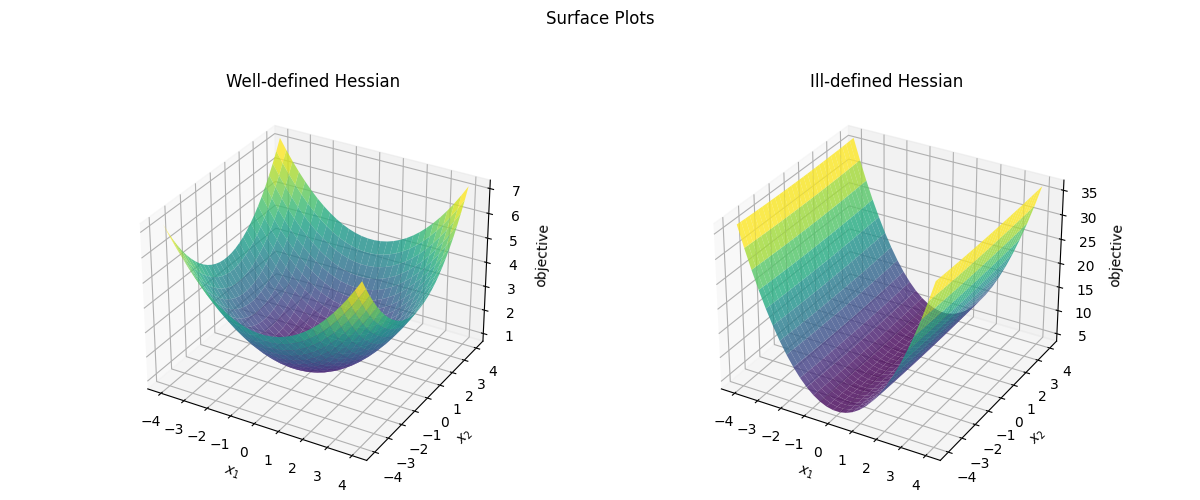

In [108]:
import matplotlib.pyplot as plt
import numpy as np


def f_global_well(x1, x2):
    return 0.05 * ((2 - x1) ** 2) + 0.05 * (x2 ** 2) + 0.05 * ((2 + x1) ** 2) + 0.05 * (x2 ** 2) + 0.05 * (x1 ** 2) + 0.05 * ((2 - x2) ** 2) +  0.05 * (x1 ** 2) + 0.05 * ((2 + x2) ** 2)

def f_global_ill(x1, x2):
    return 0.5 * ((2 - x1) ** 2) + 0.005 * (x2 ** 2) + 0.5 * ((2 + x1) ** 2) + 0.005 * (x2 ** 2) + 0.5 * (x1 ** 2) + 0.005 * ((2 - x2) ** 2) +  0.5 * (x1 ** 2) + 0.005 * ((2 + x2) ** 2)

# Create the figure and axes with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), subplot_kw={'projection': '3d'})
fig.suptitle('Surface Plots')

# Plot the surface of Z_well in the first subplot
X1, X2 = np.meshgrid(np.linspace(-4, 4, 30), np.linspace(-4, 4, 30))
Z_well = f_global_well(X1, X2)
ax1.plot_surface(X1, X2, Z_well, rstride=1, cstride=1, alpha=0.8,
                  cmap='viridis', edgecolor='none')
ax1.set_title('Well-defined Hessian')
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$x_2$")
ax1.set_zlabel("objective")

# Plot the surface of Z_ill in the second subplot
Z_ill = f_global_ill(X1, X2)
ax2.plot_surface(X1, X2, Z_ill, rstride=1, cstride=1, alpha=0.8,
                 cmap='viridis', edgecolor='none')
ax2.set_title('Ill-defined Hessian')
ax2.set_xlabel("$x_1$")
ax2.set_ylabel("$x_2$")
ax2.set_zlabel("objective")
               
# Adjust layout to prevent overlapping titles
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plots
plt.show()


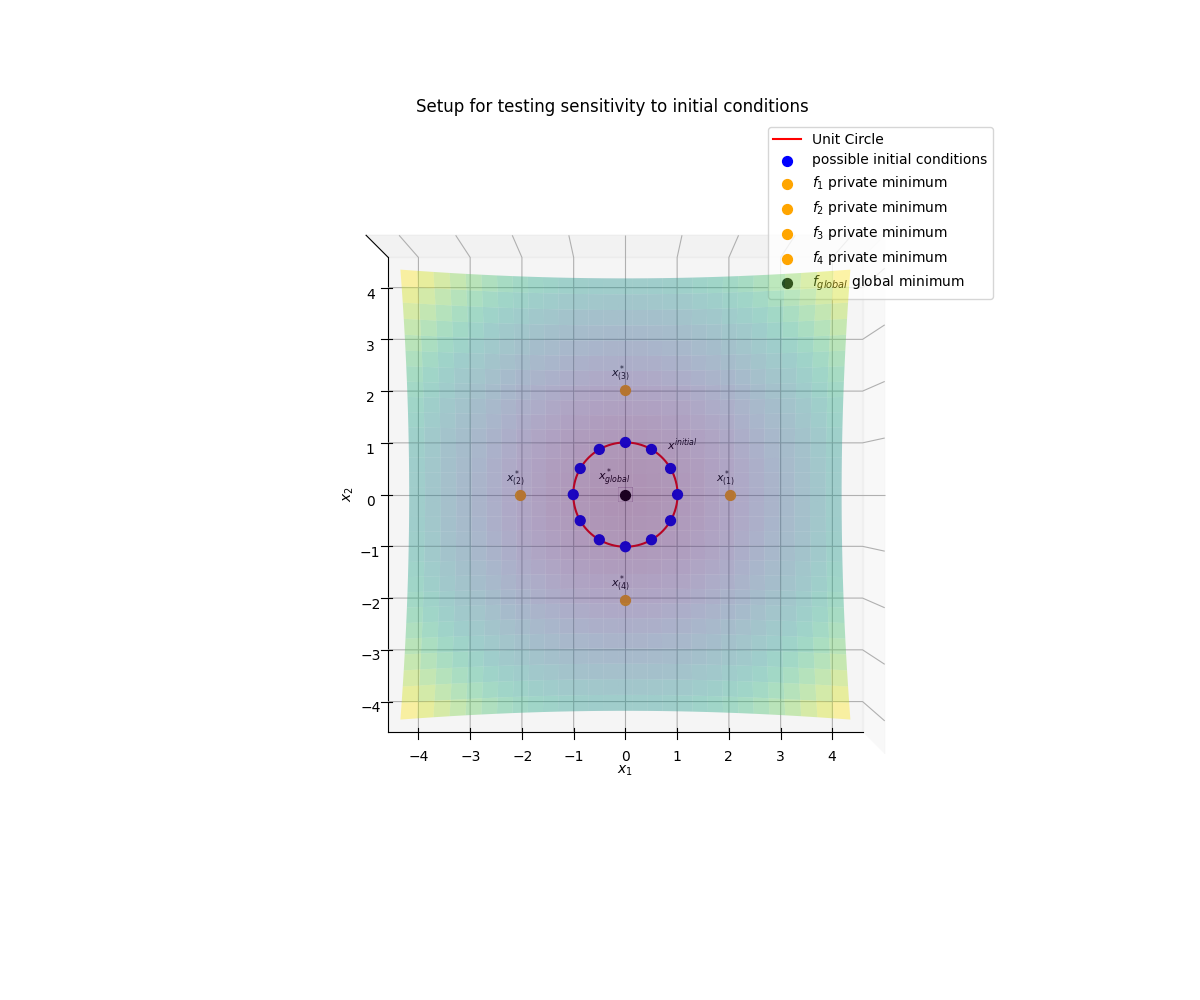

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the functions and data for Z_well
def f_global_well(x1, x2):
    return 0.5 * (x1 ** 2) + 0.5 * (x2 ** 2)

# Create the figure and axes
fig_well = plt.figure(figsize=(12, 10))
ax_well = plt.axes(projection='3d')
ax_well.view_init(elev=90, azim=-90)

# Plot the surface of Z_well
X1, X2 = np.meshgrid(np.linspace(-4, 4, 30), np.linspace(-4, 4, 30))
Z_well = f_global_well(X1, X2)
ax_well.plot_surface(X1, X2, Z_well, rstride=1, cstride=1, alpha=0.4,
                     cmap='viridis', edgecolor='none')

# Draw a unit circle on the surface of Z_well
theta_circle = np.linspace(0, 2*np.pi, 100)
x_circle = np.cos(theta_circle)
y_circle = np.sin(theta_circle)
z_circle = f_global_well(x_circle, y_circle)
ax_well.plot(x_circle, y_circle, z_circle, color='red', label='Unit Circle')

# Plot the dots on the top edge of the circle
theta_dots = np.arange(0, 2*np.pi, np.radians(30))
selected_indices = range(len(theta_dots))  # Indices representing 0, 30, 60, and 90 degrees
x_dots = np.cos(theta_dots[selected_indices])
y_dots = np.sin(theta_dots[selected_indices])
z_dots = f_global_well(x_dots, y_dots)
ax_well.scatter(x_dots, y_dots, z_dots, color="blue", s=50, label="possible initial conditions")

# Annotate the dots with labels

dot_labels = ["", r"$x^{initial}$"]
offset_factor = 1.6  # Adjust the distance of labels from dots
for i, label in enumerate(dot_labels):
    ax_well.text(x_dots[i]*offset_factor, y_dots[i]*offset_factor, z_dots[i]*offset_factor, label, 
                 color='black', fontsize=8, ha='right', va='bottom')

# Additional dots with the same color
additional_dots = [(2, 0, f_global_well(2, 0), "$x_{(1)}^*$", "$f_1$ private minimum" ),
                   (-2, 0, f_global_well(-2, 0), "$x_{(2)}^*$", "$f_2$ private minimum"),
                   (0, 2, f_global_well(0, 2), "$x_{(3)}^*$", "$f_3$ private minimum"),
                   (0, -2, f_global_well(0, -2), "$x_{(4)}^*$", "$f_4$ private minimum")
                 ]

common_color = 'orange'
for dot in additional_dots:
    
    ax_well.scatter(dot[0], dot[1], dot[2], color=common_color, s=50, label=dot[4])
    # Annotate the dots with labels
    ax_well.text(dot[0]+0.1, dot[1]+0.1, dot[2], dot[3], 
                 color='black', fontsize=8, ha='right', va='bottom')

ax_well.scatter(0, 0, f_global_well(0, 0), color="black", s=50, label="$f_{global}$ global minimum")
ax_well.text(0+0.1, 0+0.1, f_global_well(0, 0), "$x_{global}^*$", 
                 color='black', fontsize=8, ha='right', va='bottom')

ax_well.set_title("Setup for testing sensitivity to initial conditions ")
ax_well.set_xlabel("$x_1$")
ax_well.set_ylabel("$x_2$")
ax_well.set_zticks([])
ax_well.legend()

plt.show()


### 12 initial conditions

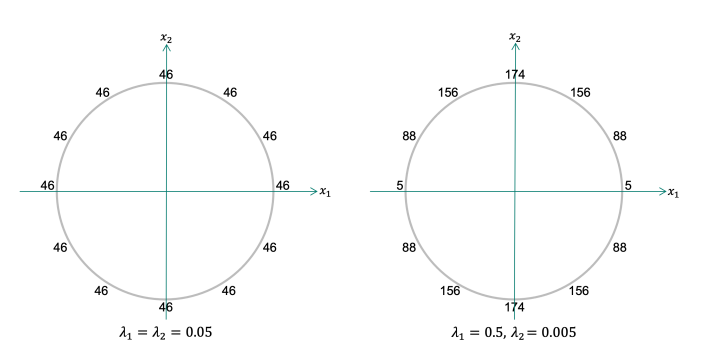

List of 12 elements, each containing coordinates:
[(1.0, 0.0), (0.8660254037844387, 0.49999999999999994), (0.5000000000000001, 0.8660254037844386), (6.123233995736766e-17, 1.0), (-0.4999999999999998, 0.8660254037844387), (-0.8660254037844387, 0.49999999999999994), (-1.0, 1.2246467991473532e-16), (-0.8660254037844386, -0.5000000000000001), (-0.5000000000000004, -0.8660254037844384), (-1.8369701987210297e-16, -1.0), (0.5000000000000001, -0.8660254037844386), (0.8660254037844384, -0.5000000000000004)]


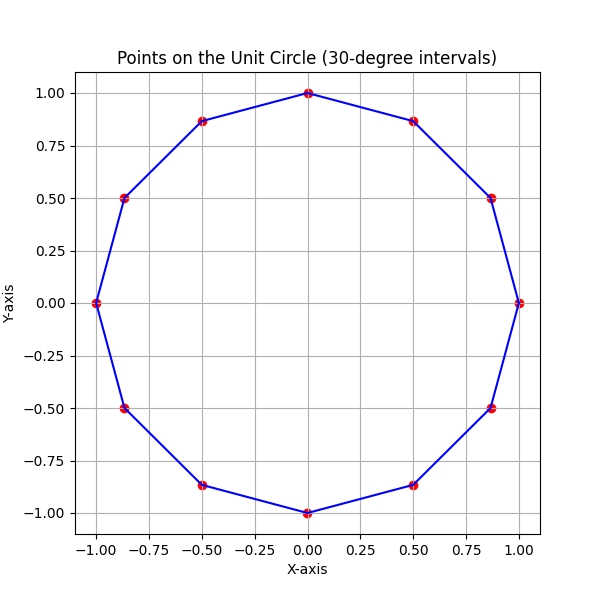

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Function to generate points on the unit circle
def generate_unit_circle_points():
    angles = np.arange(0, 360, 30)
    points = [(np.cos(np.radians(angle)), np.sin(np.radians(angle))) for angle in angles]
    return points

# Generate points on the unit circle
unit_circle_points = generate_unit_circle_points()

# Outputting the list of 12 elements, each containing coordinates
print("List of 12 elements, each containing coordinates:")
print(unit_circle_points)

# Plotting the unit circle points
x_coordinates, y_coordinates = zip(*unit_circle_points)
plt.figure(figsize=(6, 6))
plt.scatter(x_coordinates, y_coordinates, color='red')
plt.plot(x_coordinates + (x_coordinates[0],), y_coordinates + (y_coordinates[0],), color='blue')  # Connect the points to form a circle
plt.title('Points on the Unit Circle (30-degree intervals)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()


### Hyperparameters

stopping condition $\epsilon= 0.002$ 

### Simulations for *well*-defined Hessian

I expect to see the algorithms converge in the same number of iterations, independent of initial conditions

In [44]:
# dictionary of format {tupple(x_1_initial, x_2_initial) : {"n_iterationsUntilConvergence": n_iterationsUntilConvergence , "last_x": last_x, "x_history": x_history} }
#     last_xs = np array shape (n_agents, n_params)
#           contains the final params of all agents

performance_dict = {}

# Optimizing

from comdo.utils import step_sequential
x_opt = np.array(
                  [ [0] ,
                    [0] ]
                  )
max_iterations = 200
stopping_condition = 0.002

for x_1_initial, x_2_initial in zip (x_coordinates, y_coordinates):


      # assigning the same initial condition to all agents
      x1, x2, x3, x4 = 4 * [np.array(
                                    [ [x_1_initial] ,
                                          [x_2_initial] ]
                                    )]


      # initializing integral terms. 
      # NOTE: each term must be 0
      z1, z2, z3, z4 = 4 * [np.zeros_like(x1)]

      x = [x1, x2, x3, x4]


      # # x initialized appropriately, move on
      # print("x initial (I want to see array shape (n_agents, n_params, 1) with the same initial condition for all x): ")
      # print("x: ", x)
      # print("shape x: ", np.shape(x))

      z = [z1, z2, z3, z4]
      fs_private = [f1_well, f2_well, f3_well, f4_well]


      x_inLast2Iterations = [copy.deepcopy(x), copy.deepcopy(x)]

      x_history = []
      last_iteration = 0

      for iteration in range(max_iterations):

            last_iteration = last_iteration + 1
            # np array of shape = (len(x_inLast2Iterations) * n_agents * n_params, )
                  #   contains the absolute difference of each parameter of the agents in the last 2 iterations from the optimum.
            dif_fromOptimum = np.reshape( [ [ [abs(x_inLast2Iterations[k][i][j,0] - x_opt[j]) for j in range(len(x_inLast2Iterations[0][0]))] for i in range(len(x_inLast2Iterations[0])) ] for k in range(len(x_inLast2Iterations))], newshape= -1)

            if all(dif < stopping_condition for dif in dif_fromOptimum):
                  
                  x_history.append(x)
                  performance_dict[(x_1_initial, x_2_initial)] = {"n_iterationsUntilConvergence": iteration , "last_x": x, "x_history": np.array(x_history)} 
                  break


            # PROBLEM: uncommenting this line results in halving the number of iterations -> figure out why, maybe equivalent to doubling beta
            # print(step_v3(x, z, fs_private, alpha= 3, beta= 0.2, subgradient= "autograd"))

            x_history.append(copy.deepcopy(x))

            x, z = step_sequential(x, z, fs_private, alpha= 3, beta= 0.2)
            
            x_inLast2Iterations[0] = copy.deepcopy(x_inLast2Iterations[1])
            x_inLast2Iterations[1] = copy.deepcopy(x)

            # print(x)

      performance_dict[(x_1_initial, x_2_initial)] = {"n_iterationsUntilConvergence": iteration , "last_x": x, "x_history": np.array(x_history)} 

In [45]:
performance_dict_well = copy.deepcopy(performance_dict)

for key in performance_dict.keys():
    print( f"initial condition {key} needed", performance_dict[key]["n_iterationsUntilConvergence"], "iterations to converge.")

# I epect to see similar numbers of iterations required


initial condition (1.0, 0.0) needed 71 iterations to converge.
initial condition (0.8660254037844387, 0.49999999999999994) needed 69 iterations to converge.
initial condition (0.5000000000000001, 0.8660254037844386) needed 69 iterations to converge.
initial condition (6.123233995736766e-17, 1.0) needed 71 iterations to converge.
initial condition (-0.4999999999999998, 0.8660254037844387) needed 69 iterations to converge.
initial condition (-0.8660254037844387, 0.49999999999999994) needed 69 iterations to converge.
initial condition (-1.0, 1.2246467991473532e-16) needed 71 iterations to converge.
initial condition (-0.8660254037844386, -0.5000000000000001) needed 69 iterations to converge.
initial condition (-0.5000000000000004, -0.8660254037844384) needed 69 iterations to converge.
initial condition (-1.8369701987210297e-16, -1.0) needed 71 iterations to converge.
initial condition (0.5000000000000001, -0.8660254037844386) needed 69 iterations to converge.
initial condition (0.86602540

### Simulations for *ill*-defined Hessian

I expect to see the algorithms converge in different numbers of iterations, dependent of initial conditions

In [42]:
# dictionary of format {tupple(x_1_initial, x_2_initial) : {"n_iterationsUntilConvergence": n_iterationsUntilConvergence , "last_x": last_x, "x_history": x_history} }
#     last_xs = np array shape (n_agents, n_params)
#           contains the final params of all agents

performance_dict = {}

# Optimizing

from comdo.utils import step_sequential
x_opt = np.array(
                  [ [0] ,
                    [0] ]
                  )
max_iterations = 1000
stopping_condition = 0.002

for x_1_initial, x_2_initial in zip (x_coordinates, y_coordinates):


      # assigning the same initial condition to all agents
      x1, x2, x3, x4 = 4 * [np.array(
                                    [ [x_1_initial] ,
                                          [x_2_initial] ]
                                    )]


      # initializing integral terms. 
      # NOTE: each term must be 0
      z1, z2, z3, z4 = 4 * [np.zeros_like(x1)]

      x = [x1, x2, x3, x4]


      # # x initialized appropriately, move on
      # print("x initial (I want to see array shape (n_agents, n_params, 1) with the same initial condition for all x): ")
      # print("x: ", x)
      # print("shape x: ", np.shape(x))

      z = [z1, z2, z3, z4]
      fs_private = [f1_ill, f2_ill, f3_ill, f4_ill]


      x_inLast2Iterations = [copy.deepcopy(x), copy.deepcopy(x)]

      x_history = []
      last_iteration = 0

      for iteration in range(max_iterations):

            last_iteration = last_iteration + 1
            # np array of shape = (len(x_inLast2Iterations) * n_agents * n_params, )
                  #   contains the absolute difference of each parameter of the agents in the last 2 iterations from the optimum.
            dif_fromOptimum = np.reshape( [ [ [abs(x_inLast2Iterations[k][i][j,0] - x_opt[j]) for j in range(len(x_inLast2Iterations[0][0]))] for i in range(len(x_inLast2Iterations[0])) ] for k in range(len(x_inLast2Iterations))], newshape= -1)

            if all(dif < stopping_condition for dif in dif_fromOptimum):
                  
                  x_history.append(x)
                  performance_dict[(x_1_initial, x_2_initial)] = {"n_iterationsUntilConvergence": iteration , "last_x": x, "x_history": np.array(x_history)} 
                  break


            # PROBLEM: uncommenting this line results in halving the number of iterations -> figure out why, maybe equivalent to doubling beta
            # print(step_v3(x, z, fs_private, alpha= 3, beta= 0.2, subgradient= "autograd"))

            x_history.append(copy.deepcopy(x))

            x, z = step_sequential(x, z, fs_private, alpha= 3, beta= 0.2)
            
            x_inLast2Iterations[0] = copy.deepcopy(x_inLast2Iterations[1])
            x_inLast2Iterations[1] = copy.deepcopy(x)

      performance_dict[(x_1_initial, x_2_initial)] = {"n_iterationsUntilConvergence": iteration , "last_x": x, "x_history": np.array(x_history)} 

In [43]:
performance_dict_ill = copy.deepcopy(performance_dict)

for key in performance_dict.keys():
    print( f"initial condition {key} needed", performance_dict[key]["n_iterationsUntilConvergence"], "iterations to converge.")

# I epect to see different numbers of iterations required


initial condition (1.0, 0.0) needed 14 iterations to converge.
initial condition (0.8660254037844387, 0.49999999999999994) needed 643 iterations to converge.
initial condition (0.5000000000000001, 0.8660254037844386) needed 707 iterations to converge.
initial condition (6.123233995736766e-17, 1.0) needed 723 iterations to converge.
initial condition (-0.4999999999999998, 0.8660254037844387) needed 707 iterations to converge.
initial condition (-0.8660254037844387, 0.49999999999999994) needed 643 iterations to converge.
initial condition (-1.0, 1.2246467991473532e-16) needed 14 iterations to converge.
initial condition (-0.8660254037844386, -0.5000000000000001) needed 643 iterations to converge.
initial condition (-0.5000000000000004, -0.8660254037844384) needed 707 iterations to converge.
initial condition (-1.8369701987210297e-16, -1.0) needed 723 iterations to converge.
initial condition (0.5000000000000001, -0.8660254037844386) needed 707 iterations to converge.
initial condition (0

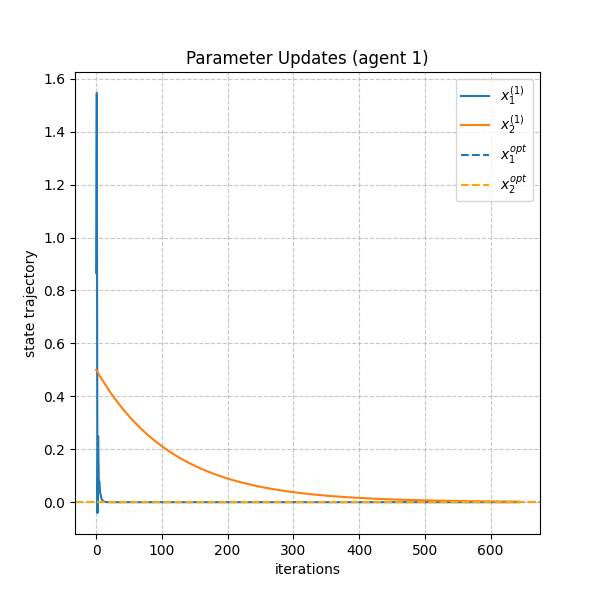

In [40]:
# inspecting longer convergence time

x_1 = performance_dict[(0.8660254037844387, 0.49999999999999994)]["x_history"][:, 0, 0, 0]
x_2 = performance_dict[(0.8660254037844387, 0.49999999999999994)]["x_history"][:, 0, 1, 0]

fig, ax = plt.subplots(figsize=(6, 6), dpi=100)

ax.plot(range(len(x_1)), x_1, label= r"$x_1^{(1)}$" )
ax.plot(range(len(x_2)), x_2, label= r"$x_2^{(1)}$" )
ax.axhline(y= 0, linestyle='dashed', label= r"$x_1^{opt}$")
ax.axhline(y= 0, linestyle='dashed', label=r"$x_2^{opt}$", color="orange")
ax.set_title("Parameter Updates (agent 1)")
ax.set_xlabel("iterations")
ax.set_ylabel("state trajectory")
ax.grid(True, linestyle='--', alpha=0.7)  
ax.legend()
plt.show()


# Perfect! 
All good for sensitivity to initial conditions benchmarks, now plot on the circle for well- and ill-defined Hessians

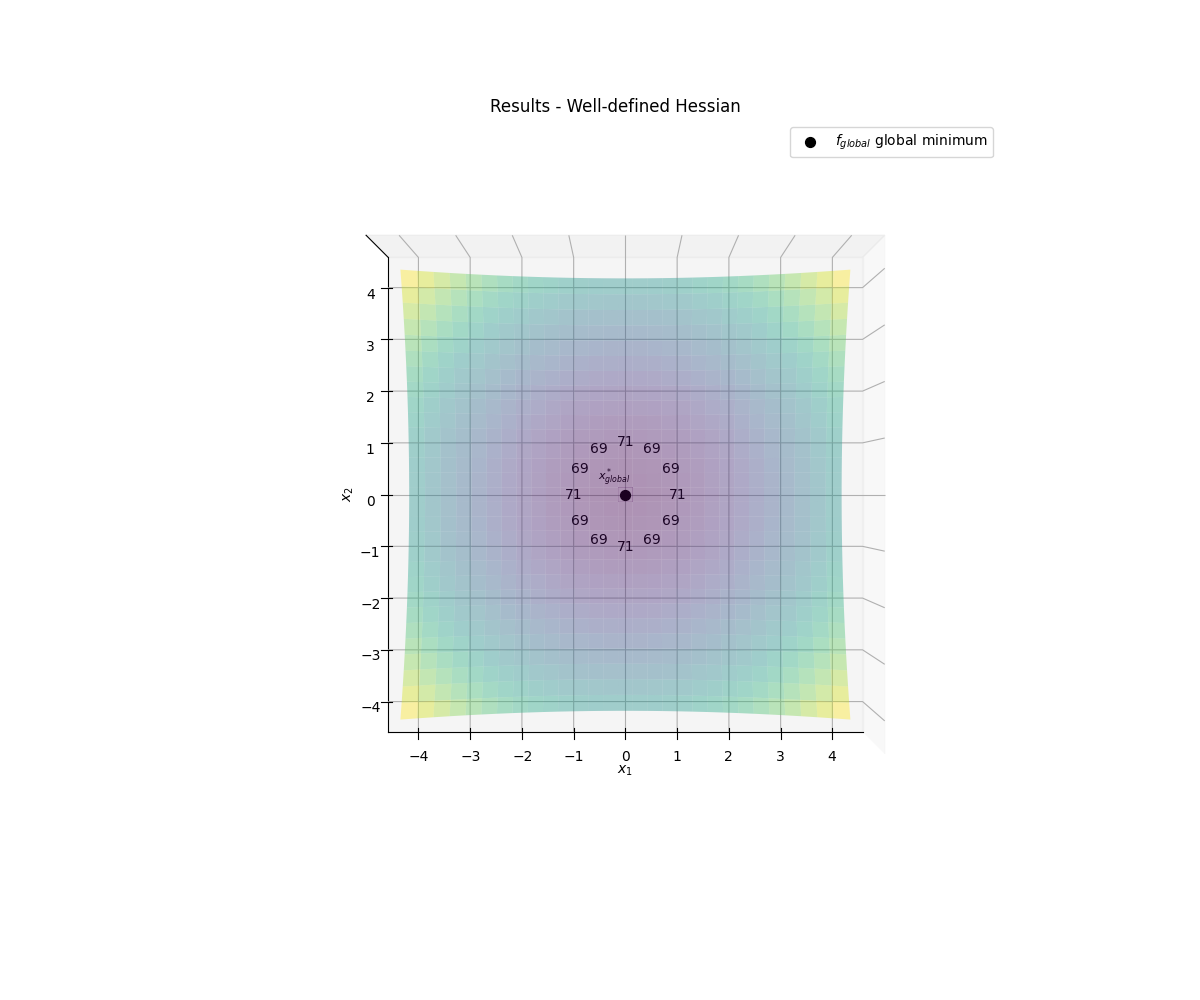

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the functions and data for Z_well
def f_global_well(x1, x2):
    return 0.5 * (x1 ** 2) + 0.5 * (x2 ** 2)

# Create the figure and axes
fig_well = plt.figure(figsize=(12, 10))
ax_well = plt.axes(projection='3d')
ax_well.view_init(elev=90, azim=-90)

# Plot the surface of Z_well
X1, X2 = np.meshgrid(np.linspace(-4, 4, 30), np.linspace(-4, 4, 30))
Z_well = f_global_well(X1, X2)
ax_well.plot_surface(X1, X2, Z_well, rstride=1, cstride=1, alpha=0.4,
                     cmap='viridis', edgecolor='none')

# Draw a unit circle on the surface of Z_well
theta_circle = np.linspace(0, 2*np.pi, 100)
x_circle = np.cos(theta_circle)
y_circle = np.sin(theta_circle)
z_circle = f_global_well(x_circle, y_circle)
# ax_well.plot(x_circle, y_circle, z_circle, color='red', label='Unit Circle')

# Plot the dots on the top edge of the circle
theta_dots = np.arange(0, 2*np.pi, np.radians(30))
selected_indices = range(len(theta_dots))  # Indices representing 0, 30, 60, and 90 degrees

x_initial, y_initial = list(x_coordinates), list(y_coordinates)
z_dots = [f_global_well(x_initial[i], y_initial[i])for i in range(len(x_initial))] 

# ax_well.scatter(x_dots, y_dots, z_dots, color="blue", s=50, label="possible initial conditions")

# Annotate the dots with labels

dot_labels = [performance_dict_well[(x_i, y_i)]["n_iterationsUntilConvergence"] for x_i, y_i in zip(x_initial, y_initial)]
# offset_factor = 1  # Adjust the distance of labels from dots
# for i, label in enumerate(dot_labels):
#     ax_well.text(x_dots[i]*offset_factor, y_dots[i]*offset_factor, z_dots[i]*offset_factor, label, 
#                  color='black', fontsize=8, ha='right', va='bottom')

for i, label in enumerate(dot_labels):
    ax_well.text(x_dots[i], y_dots[i], z_dots[i], label, 
                 color='black', fontsize=10, ha='center', va='center')


# Additional dots with the same color
private_minima = [(2, 0, f_global_well(2, 0), "$x_{(1)}^*$", "$f_1$ private minimum" ),
                   (-2, 0, f_global_well(-2, 0), "$x_{(2)}^*$", "$f_2$ private minimum"),
                   (0, 2, f_global_well(0, 2), "$x_{(3)}^*$", "$f_3$ private minimum"),
                   (0, -2, f_global_well(0, -2), "$x_{(4)}^*$", "$f_4$ private minimum")
                 ]

common_color = 'orange'
# for dot in private_minima:
#     ax_well.scatter(dot[0], dot[1], dot[2], color=common_color, s=50, label=dot[4])
#     # Annotate the dots with labels
#     ax_well.text(dot[0]+0.1, dot[1]+0.1, dot[2], dot[3], 
#                  color='black', fontsize=8, ha='right', va='bottom')

ax_well.scatter(0, 0, f_global_well(0, 0), color="black", s=50, label="$f_{global}$ global minimum")
ax_well.text(0+0.1, 0+0.1, f_global_well(0, 0), "$x_{global}^*$", 
                 color='black', fontsize=8, ha='right', va='bottom')

ax_well.set_title("Results - Well-defined Hessian")
ax_well.set_xlabel("$x_1$")
ax_well.set_ylabel("$x_2$")
ax_well.set_zticks([])
ax_well.legend()

plt.show()
